## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Get data

In [3]:
df = pd.read_csv("data.csv")

df.describe()

,x,y
count,1000.000000,999.000000
mean,53.771157,50.319804
std,113.747929,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


## Show

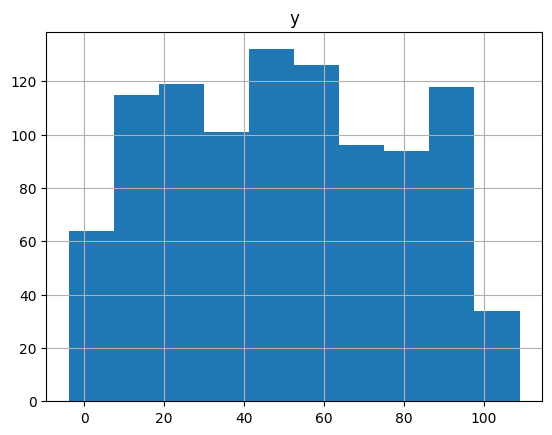

In [5]:
viz = df[['y']]
viz.hist()
plt.show()

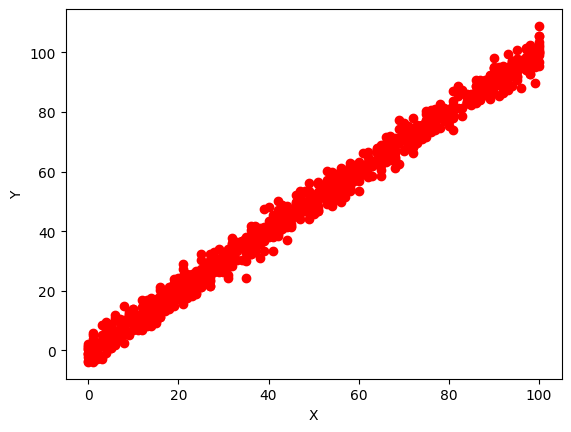

In [8]:
plt.scatter(df.x,df.y, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Seprate data

In [39]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## Plot 

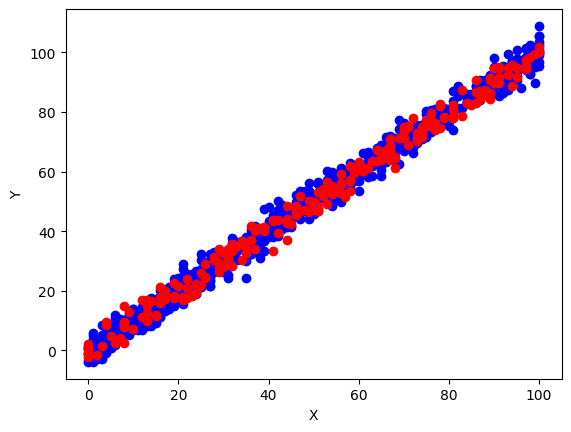

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train.x, train.y, color="blue")
ax1.scatter(test.x, test.y, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Get results

In [19]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["x"]])
train_y = np.asanyarray(train[["y"]])
reg.fit(train_x, train_y)
# Results
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[1.00690278]]
Intercept:  [-0.31037963]


### plot

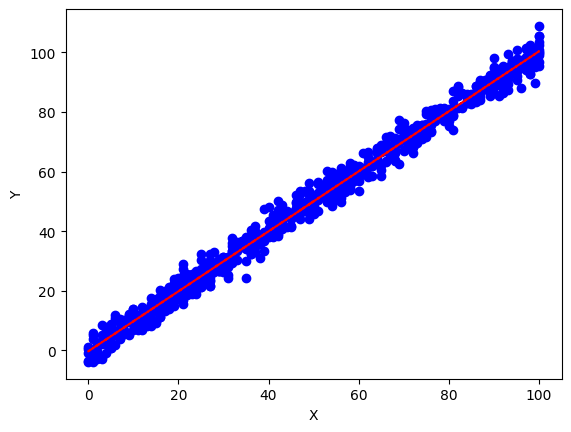

In [21]:
plt.scatter(train.x , train.y, color="blue")
plt.plot(train_x, reg.coef_ * train_x + reg.intercept_, "--r")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Predict

In [41]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["x"]])
test_y = np.asanyarray(test[["y"]])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2.21
Residual sum of squares (MSE): 7.60
R2-score: 0.99
